<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/%EA%B3%B5%EA%B3%B5%EC%A1%B0%EB%8B%AC(220204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
##데이터 전처리 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import matplotlib.font_manager as fm

In [195]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [55]:
##종합 쇼핑몰 납품 요구 내역 월별 데이터 불러오기 (2021년)
df1 = pd.read_csv("1월.csv")
df2 = pd.read_csv("2월.csv")
df3 = pd.read_csv("3월.csv")
df4 = pd.read_csv("4월.csv")
df5 = pd.read_csv("5월.csv")
df6 = pd.read_csv("6월.csv")
df7 = pd.read_csv("7월.csv")
df8 = pd.read_csv("8월.csv")
df9 = pd.read_csv("9월.csv")
df10 = pd.read_csv("10월.csv")
df11 = pd.read_csv("11월.csv")
df12 = pd.read_csv("12월.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [56]:
##종합 쇼핑몰 납품 요구 내역 2021년 데이터
df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
df_all.to_csv("종합.csv")

In [39]:
##1년단위 조달청 별 데이터 불러오기
df20 = pd.read_csv("경남20.csv")
df21 = pd.read_csv("경남21.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
##2년 단위 조달청 데이터로 합치기
df2021 = pd.concat([df20, df21])
df2021.to_csv("경남지방조달청.csv")

In [108]:
##원하는 조달청 데이터 불러오기
name = str(input("원하시는 조달청의 이름을 입력해주세요."))
df_origin = pd.read_csv("{}.csv".format(name), parse_dates = ['납품요구접수일자'])
df_origin.set_index(df_origin['납품요구접수일자'], inplace=True)

원하시는 조달청의 이름을 입력해주세요.종합


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [109]:
##칼럼명 확인
df_origin.columns

Index(['Unnamed: 0', '납품요구번호', '납품요구변경차수', '수요기관명', '납품요구접수일자', '납품요구건명',
       '업체명', '대표물품분류번호', '대표품명', '대표세부물품분류번호', '대표세부품명', '증감납품요구수량',
       '증감납품요구금액', '최대납품기한', '계약구분', '계약번호', '계약변경차수', '다수공급자계약여부', '우수제품여부',
       '최종납품요구여부', '최초납품요구접수일자', '최초납품요구금액', '수요기관코드', '수요기관구분', '수요기관지역명',
       '업체사업자등록번호', '업체기업구분명', '납품요구지청명'],
      dtype='object')

In [110]:
##원하는 검색 기간 설정
input_start = input("시작지점 'yyyy-mm-dd' or 현재")
if input_start == '현재':
  now = datetime.now()
  nowDate = now.strftime('%Y-%m-%d')
  start = nowDate
else:
  start = input_start

end = input("종료지점 'yyyy-mm-dd'")

df_origin = df_origin[start:end]


시작지점 'yyyy-mm-dd' or 현재'2021-01-01'
종료지점 'yyyy-mm-dd''2021-12-31'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  if sys.path[0] == '':


In [156]:
##원하는 칼럼만 추출
df = df_origin[['대표세부품명', '대표세부물품분류번호', '증감납품요구수량', '증감납품요구금액']]

In [157]:
##대표세부품명별 합계 확인
df2 = df.groupby(['대표세부품명', '대표세부물품분류번호']).sum()

In [158]:
##납품요구수량 기준 내림차순 정렬
df2 = df2.sort_values('증감납품요구수량', ascending=False)

In [159]:
##랭킹 칼럼 추가, 인덱스로 지정
df2['rank'] = df2['증감납품요구수량'].rank(method='max', ascending=False)
df2 = df2.reset_index()
df2 = df2.set_index(df2['rank'])
df2 = df2.drop(['rank'], axis=1)

In [160]:
df2

,대표세부품명,대표세부물품분류번호,증감납품요구수량,증감납품요구금액
rank,,,,
1.0,쓰레기봉투,4712170101,1.706780e+09,101164483230
2.0,경유,1510150501,5.242174e+08,348164995510
3.0,라벨용지,5512161201,3.416568e+08,8898420980
4.0,보건용마스크,4618200103,3.123527e+08,67808029660
5.0,콘크리트벽돌,3013160301,2.086848e+08,11658806130
...,...,...,...,...
1225.0,무인기촬영서비스,7811159901,0.000000e+00,0
1226.0,자외선살균기,4710151701,-2.000000e+00,-317102940
1227.0,감압밸브,4014165201,-1.000000e+01,-62461000


In [161]:
##증감납품요구수량 상위 10개 품목 확인
df2[:10]

,대표세부품명,대표세부물품분류번호,증감납품요구수량,증감납품요구금액
rank,,,,
1.0,쓰레기봉투,4712170101,1.706780e+09,101164483230
2.0,경유,1510150501,5.242174e+08,348164995510
3.0,라벨용지,5512161201,3.416568e+08,8898420980
4.0,보건용마스크,4618200103,3.123527e+08,67808029660
5.0,콘크리트벽돌,3013160301,2.086848e+08,11658806130
6.0,항공기연료,1510150401,9.859411e+07,71223306520
7.0,미장벽돌,3013160202,5.727896e+07,20985687940
8.0,기타화초,1016169901,4.629742e+07,50586041310
9.0,상온주스,5020230401,4.626541e+07,16441955200


In [162]:
##상위 10개품목 이름 저장
product = []
for i in range(10):
  product.append(df2.iat[i,0])

In [165]:
##상위 10개 품목별 데이터프레임 생성
df_1 = df[df['대표세부품명'] == product[0]]
df_2 = df[df['대표세부품명'] == product[1]]
df_3 = df[df['대표세부품명'] == product[2]]
df_4 = df[df['대표세부품명'] == product[3]]
df_5 = df[df['대표세부품명'] == product[4]]
df_6 = df[df['대표세부품명'] == product[5]]
df_7 = df[df['대표세부품명'] == product[6]]
df_8 = df[df['대표세부품명'] == product[7]]
df_9 = df[df['대표세부품명'] == product[8]]
df_10 = df[df['대표세부품명'] == product[9]]

In [167]:
##데이터 프레임 시간순서 정렬 (오래된 것 -> 최근 순)
df_1 = df_1.sort_index()
df_2 = df_1.sort_index()
df_3 = df_1.sort_index()
df_4 = df_1.sort_index()
df_5 = df_1.sort_index()
df_6 = df_1.sort_index()
df_7 = df_1.sort_index()
df_8 = df_1.sort_index()
df_9 = df_1.sort_index()
df_10 = df_1.sort_index()

In [176]:
df_1

,대표세부품명,대표세부물품분류번호,증감납품요구수량,증감납품요구금액
납품요구접수일자,,,,
2021-01-04,쓰레기봉투,4712170101,1700000.0,88200000
2021-01-04,쓰레기봉투,4712170101,2000000.0,82000000
2021-01-04,쓰레기봉투,4712170101,750000.0,93000000
2021-01-04,쓰레기봉투,4712170101,2000000.0,94050000
2021-01-04,쓰레기봉투,4712170101,100000.0,12400000
...,...,...,...,...
2021-12-27,쓰레기봉투,4712170101,3068000.0,63119000
2021-12-28,쓰레기봉투,4712170101,4030000.0,264348000
2021-12-31,쓰레기봉투,4712170101,1205000.0,25690000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_

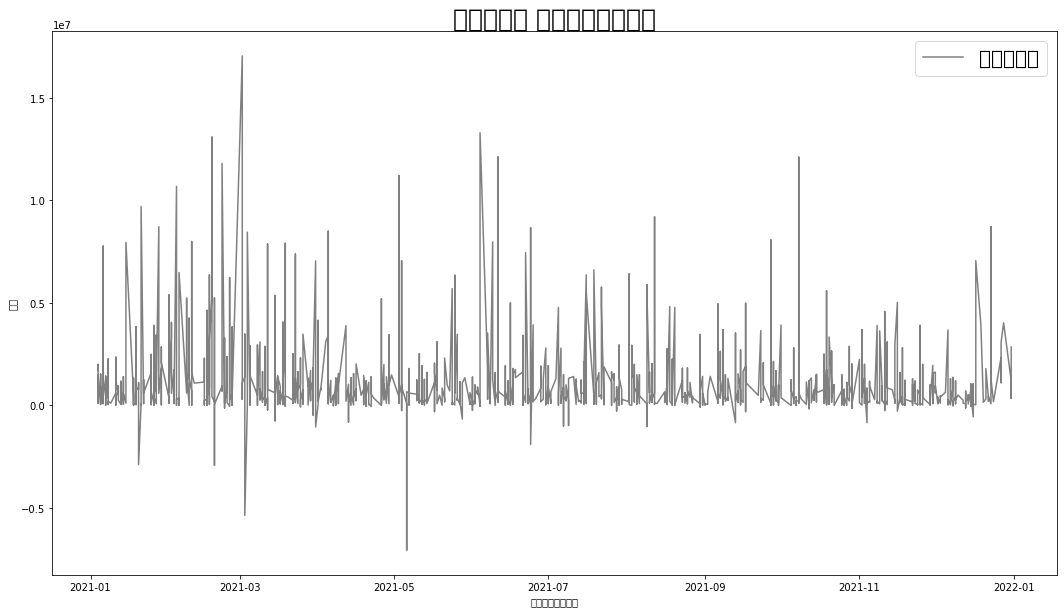

In [201]:
df__1 = df_1.reset_index()
plt.figure(figsize = (18,10))
plt.title("{} 증감납품요구수량".format(product[0]), fontsize=25)
plt.plot(df__1['납품요구접수일자'], df__1['증감납품요구수량'], color='grey', label=str(product[0]))
plt.ylabel('증감납품요구수량')
plt.xlabel('날짜')
plt.legend(fontsize=20)
plt.show()
